# Introduction

Linear Regression Analysis

In [1]:
# By default in a Jupyter notebook, a cell with multiple print commands, when run, would print only the last one. 
# This piece of code would modify that to print all the relevant lines in the cell.  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import statsmodels.api as sm # import statsmodels 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
import matplotlib.pyplot as plt
import math

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

## Loading the data

To illustrate regression analysis, we will use AMES data. Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.


Source:
De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project," Journal of Statistics Education, Volume 19, Number 3.

http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [3]:
# Load data
indata = pd.read_csv("data/AmesHousing.csv")
print("indata : " + str(indata.shape))

indata : (2930, 82)


## Data Cleaning and Feature Creation
Skipped in this notebook are all the steps for data cleaning and feature creation
Please refer to this notebook for a detailed insight into the above mentioned aspects
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

## Split data into training and testing

In [4]:
#####Random split
#train, test = train_test_split(indata, train_size=0.70, random_state=42)
#print("train : " + str(train.shape))
#print("test : " + str(test.shape))

In [5]:
# Split by year
train = indata[np.array(indata['Yr Sold'].astype(np.float32)) < 2010]
test = indata[np.array(indata['Yr Sold'].astype(np.float32)) >= 2010]
print("train : " + str(train.shape))
print("test : " + str(test.shape))

train : (2589, 82)
test : (341, 82)


## Exploratory Data Analysis

In [6]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

Find most important features relative to target
SalePrice          1.000
Overall Qual       0.802
Gr Liv Area        0.709
Garage Cars        0.648
Garage Area        0.643
Total Bsmt SF      0.629
1st Flr SF         0.619
Year Built         0.555
Full Bath          0.553
Year Remod/Add     0.535
Garage Yr Blt      0.524
Mas Vnr Area       0.514
TotRms AbvGrd      0.499
Fireplaces         0.478
BsmtFin SF 1       0.432
Lot Frontage       0.366
Wood Deck SF       0.338
Open Porch SF      0.307
Half Bath          0.284
Bsmt Full Bath     0.284
2nd Flr SF         0.277
Lot Area           0.258
Bsmt Unf SF        0.181
Bedroom AbvGr      0.148
Screen Porch       0.115
Pool Area          0.071
Mo Sold            0.031
3Ssn Porch         0.029
BsmtFin SF 2       0.011
Yr Sold           -0.010
Misc Val          -0.016
Bsmt Half Bath    -0.037
Low Qual Fin SF   -0.038
Order             -0.062
MS SubClass       -0.074
Overall Cond      -0.106
Kitchen AbvGr     -0.117
Enclosed Porch    -0.125
PI

### Constructing Feature Matrix

In [7]:
train_slm = train[['Gr Liv Area','SalePrice']]
X = train_slm[['Gr Liv Area']] ## X usually means our input variables (or independent variables)
y = train_slm.SalePrice ## Y usually means our output/dependent variable

test_slm = test[['Gr Liv Area','SalePrice']]
X_test = test_slm[['Gr Liv Area']]
y_test = test_slm.SalePrice

In [8]:
train_slm.describe()

,Gr Liv Area,SalePrice
count,2589.000,2589.000
mean,1505.577,181875.888
std,510.237,80504.708
min,334.000,13100.000
25%,1131.000,129900.000
50%,1450.000,161500.000
75%,1750.000,214000.000
max,5642.000,755000.000


## Scatter Plot of response and regressors

Text(0.5, 1.0, 'Bi-variate Scatter Plot')

Text(0.5, 0, 'X')

Text(0, 0.5, 'SalePrice')

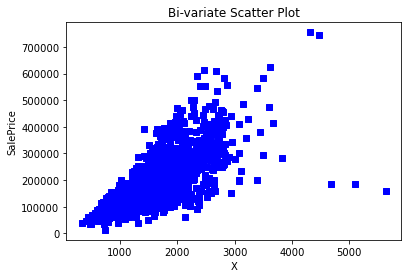

In [9]:
# Lets fit a simple linear model using a single regressor 
plt.scatter(X, y, c = "blue", marker = "s")
plt.title("Bi-variate Scatter Plot")
plt.xlabel("X")
plt.ylabel("SalePrice")
plt.show()

In [10]:
## Influencial observations
train_slm[np.array(train_slm['Gr Liv Area'].astype(np.float32)) > 4000]

,Gr Liv Area,SalePrice
1498,5642,160000
1760,4476,745000
1767,4316,755000
2180,5095,183850
2181,4676,184750


In [11]:
####Remove influential observations
train_cl = train_slm[np.array(train_slm['Gr Liv Area'].astype(np.float32)) < 4000]
print("num of observations removed : " + str(train_slm.shape[0] - train_cl.shape[0]))
X = train_cl[['Gr Liv Area']] ## X usually means our input variables (or independent variables)
y = train_cl.SalePrice ## Y usually means our output/dependent variable

num of observations removed : 5


## Distribution Analysis of Response

((array([-3.46187829, -3.21552519, -3.07914658, ...,  3.07914658,
          3.21552519,  3.46187829]),
  array([ 13100,  34900,  35000, ..., 610000, 615000, 625000])),
 (74467.22960724245, 181442.75348297213, 0.9415030723170231))

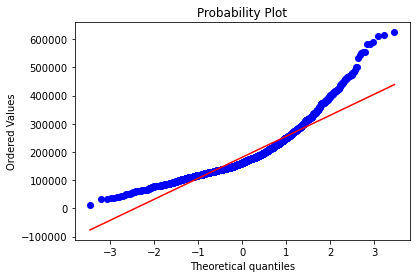

((array([-3.46187829, -3.21552519, -3.07914658, ...,  3.07914658,
          3.21552519,  3.46187829]),
  array([ 9.48036751, 10.46024211, 10.46310334, ..., 13.32121424,
         13.32937755, 13.34550693])),
 (0.4023941289877257, 12.0257616617671, 0.9938320751082984))

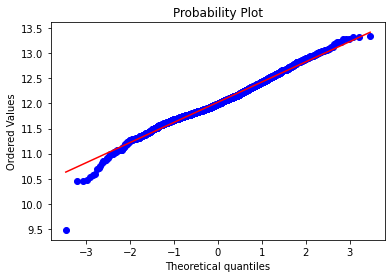

In [12]:
# Normal Probability plot of the Response
from scipy import stats
stats.probplot(y, plot=plt)
plt.show()

#Normal Probability plot of transformed response
from scipy import stats
stats.probplot(np.log(y), plot=plt)
plt.show()

### Transform Response?

In [13]:
y_= np.log(y)
y_test_ = np.log(y_test)
#y_= y
#y_test_=y_test

## Fit a Regression Model

In [14]:
X_ = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y_, X_).fit() ## sm.OLS(output, input)
predictions = model.predict(X_)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2782.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:53:28   Log-Likelihood:                -382.47
No. Observations:                2584   AIC:                             768.9
Df Residuals:                    2582   BIC:                             780.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.1322      0.018    624.758      0.000      11.097      11.167
Gr Liv Area     0.0006   1.13e-05     52.746      0.000       0.001       0.001
==============================================================================
Omnibus:                      298.604   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              745.402
Skew:                          -0.657   Prob(JB):                    1.37e-162
Kurtosis:                       5.279   Cond. No.                     5.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print('Parameters: ', model.params)
print('Standard errors: ', model.bse)
print('Predicted values: ', model.predict())

Parameters:  const         11.132
Gr Liv Area    0.001
dtype: float64
Standard errors:  const         0.018
Gr Liv Area   0.000
dtype: float64
Predicted values:  [11.65791298 11.98694395 12.74395361 ... 11.71036719 11.96012077
 12.32431991]


### Residual Analysis

Text(0.5, 1.0, 'Residual Plot')

Text(0.5, 0, 'Independent Variable')

Text(0, 0.5, 'Residual')

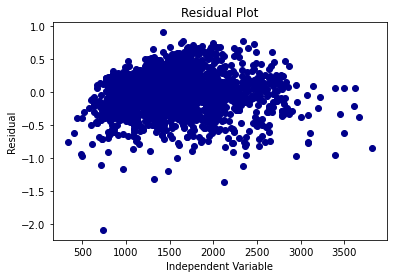

In [16]:
#Residuals vs Regressor
residuals = y_- predictions
plt.plot(X,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")


Text(0.5, 1.0, 'Residual Plot')

Text(0.5, 0, 'Predicted response')

Text(0, 0.5, 'Residual')

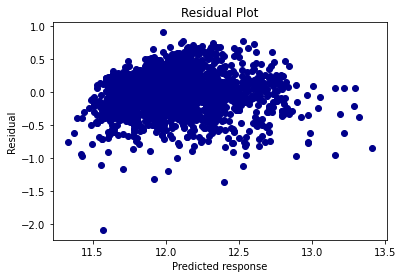

In [17]:
#Residuals vs Predicted
residuals = y_ - predictions
plt.plot(predictions,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Predicted response")
plt.ylabel("Residual")


((array([-3.46187829, -3.21552519, -3.07914658, ...,  3.07914658,
          3.21552519,  3.46187829]),
  array([-2.08873095, -1.35769511, -1.32056895, ...,  0.76340448,
          0.76477227,  0.90101423])),
 (0.27696081763244546, 6.682716320932488e-15, 0.9859422287852991))

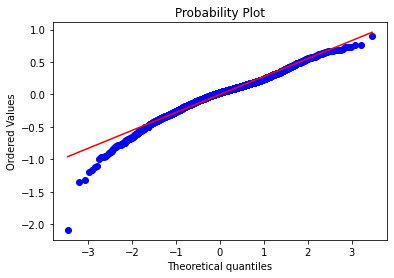

In [18]:
# Normal Probability Plot of residuals
from scipy import stats
stats.probplot(residuals, plot=plt)
plt.show()

Text(0.5, 1.0, 'Actuals vs Regression Line')

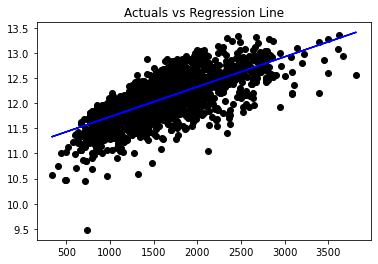

In [19]:
#Plot Our Actual and Predicted Values
plt.plot(X, y_, 'o', color='black');
plt.plot(X,predictions,color='blue')
plt.title("Actuals vs Regression Line")

### Hypothesis Test and CI on the Parameters

In [20]:
from scipy import stats
#tStat, pValue =  scipy.stats.ttest_1samp(model.params[1], 0, axis=0)
#print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
N = 2589
t = model.params[1]/model.bse[1]
print("t-statistic for slope : " + str(t))

## Compare with the critical t-value
#Degrees of freedom
df = N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)
print("p-value for hypothesis on slope=0 : " + str(p))

#Confidence Interval on the slope
ci_slope = stats.t.interval(alpha=0.95, df=N-1, loc=model.params[1], scale=model.bse[1]) 
print("CI on the slope parameter : " + str(ci_slope))

t-statistic for slope : 52.74595507389235
p-value for hypothesis on slope=0 : 0.0
CI on the slope parameter : (0.0005739111076576919, 0.000618230090598494)


### Prediction Accuracy

In [21]:
predictions = model.predict(sm.add_constant(X_test))
predictions.head()
y_test_.head()
rmse = math.sqrt(np.square(np.subtract(y_test_,predictions)).mean())
rmse

0   12.119
1   11.666
2   11.924
3   12.390
4   12.103
dtype: float64

0   12.278
1   11.562
2   12.055
3   12.405
4   12.154
Name: SalePrice, dtype: float64

0.319116704202412

### Model Adequacy Checking

In [22]:
## t-test
print(model.t_test([1, 0]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            11.1322      0.018    624.758      0.000      11.097      11.167


In [23]:
# anova or F test
print(model.f_test(np.identity(2)))

<F test: F=array([[2373106.41131671]]), p=0.0, df_denom=2.58e+03, df_num=2>


### Influence and Leverage points

In [24]:
## Calculate the influence of each observation
test_class = OLSInfluence(model)
test_class.dfbetas[(1063,2180),:]

array([[-0.00272592,  0.00207899],
       [ 0.00409795, -0.00147817]])

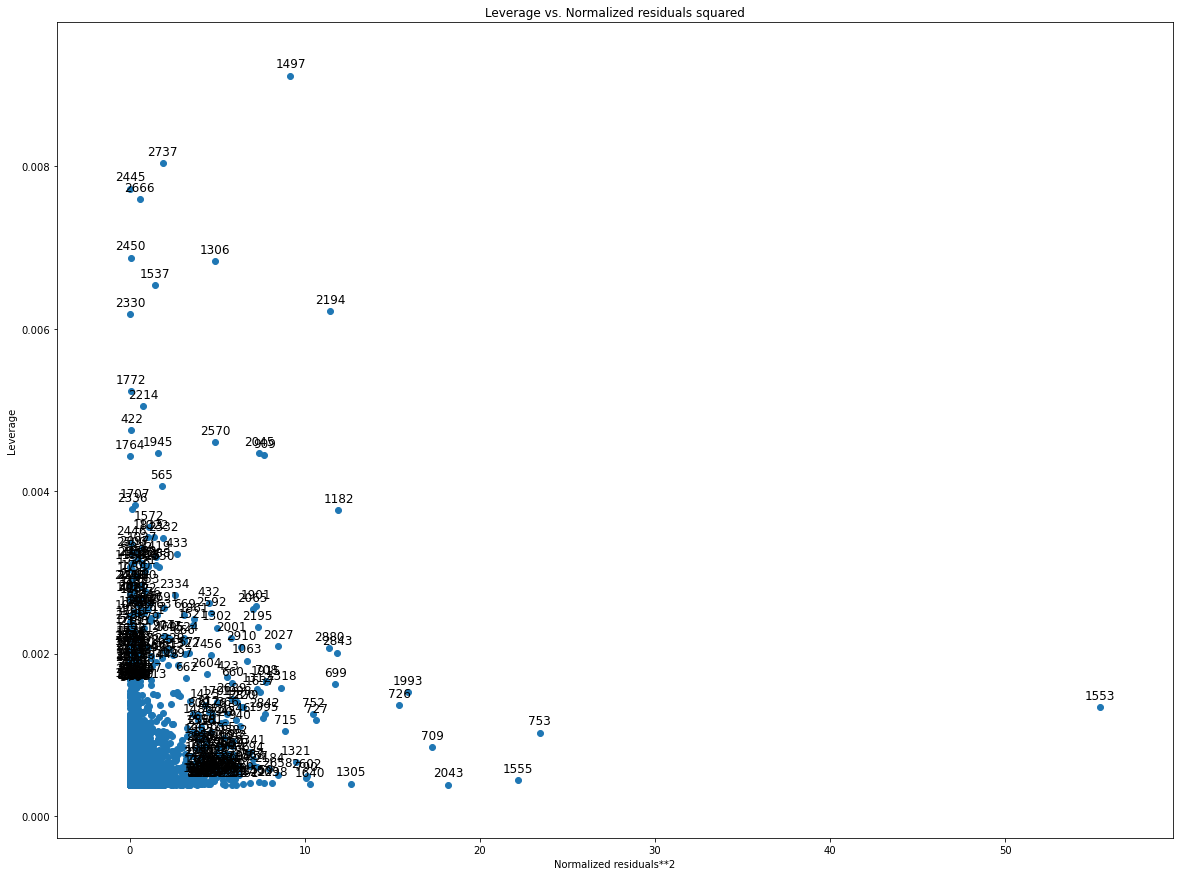

In [25]:
# Checking for leverage and influential outliers
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(20,15))
fig = plot_leverage_resid2(model, ax = ax)

### Computing the Hat Matrix

In [26]:
## Computing inverse Hat matrix X((X'X)^-1)X'
print("X : " + str(X_.shape))
Cmat = np.linalg.inv(X_.transpose().dot(X_))
#(X'X)^-1
print("C matrix or (X'X)^-1 : " + str(Cmat.shape))
hat_mat_ = Cmat.dot(X_.transpose())
hat_mat = X_.dot(hat_mat_)
print("Hat matrix or X((X'X)^-1)X' : " + str(hat_mat.shape))

X : (2584, 2)
C matrix or (X'X)^-1 : (2, 2)
Hat matrix or X((X'X)^-1)X' : (2584, 2584)


### Using SciKit Learn

In [30]:
from sklearn import linear_model
lm = linear_model.LinearRegression(fit_intercept = True, normalize = True)
model = lm.fit(X,y_)
predictions = lm.predict(X_test)

#Returns the coefficient of determination R^2 of the prediction.
lm.score(X,y_)

print("slope: {0}".format(lm.coef_))
print("intercept: {0}".format(lm.intercept_))

0.5186549879598494

slope: [0.00059607]
intercept: 11.132178708914056


In [32]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(y_test_, predictions)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error: " + str(RMSE))

Root Mean Square Error: 0.3191167042024126


### Categorical Variable

In [33]:
train_slm = train[['Overall Qual','SalePrice']]
X = train_slm[['Overall Qual']] ## X usually means our input variables (or independent variables)
y = train_slm.SalePrice ## Y usually means our output/dependent variable

test_slm = test[['Overall Qual','SalePrice']]
X_test = test_slm[['Overall Qual']]
y_test = test_slm.SalePrice

y_= np.log(y)
y_test_ = np.log(y_test)

In [34]:
Qual_ind = pd.get_dummies(X['Overall Qual'], drop_first=True).rename(columns=lambda x: 'OverallQual_' + str(x))

X_ind = pd.concat([X, Qual_ind], axis=1)
X_ind.head()

result = sm.OLS(y_, sm.add_constant(Qual_ind)).fit()
result.summary()

,Overall Qual,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10
341,6,0,0,0,0,1,0,0,0,0
342,6,0,0,0,0,1,0,0,0,0
343,8,0,0,0,0,0,0,1,0,0
344,6,0,0,0,0,1,0,0,0,0
345,8,0,0,0,0,0,0,1,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     655.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:57:15   Log-Likelihood:                 200.23
No. Observations:                2589   AIC:                            -380.5
Df Residuals:                    2579   BIC:                            -321.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.5966      0.112     94.445      0.000      10.377      10.817
OverallQual_2      0.2631      0.131      2.008      0.045       0.006       0.520
OverallQual_3      0.6798      0.118      5.740      0.000       0.448       0.912
OverallQual_4      0.9491      0.113      8.372      0.000       0.727       1.171
OverallQual_5      1.1941      0.113     10.614      0.000       0.974       1.415
OverallQual_6      1.3764      0.113     12.230      0.000       1.156       1.597
OverallQual_7      1.6069      0.113     14.269      0.000       1.386       1.828
OverallQual_8      1.8943      0.113     16.777      0.000       1.673       2.116
OverallQual_9      2.1910      0.114     19.141      0.000       1.967       2.415
OverallQual_10     2.3634      0.119     19.824      0.000       2.130       2.597
==============================================================================
Omnibus:                      130.753   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.513
Skew:                          -0.300   Prob(JB):                     2.76e-67
Kurtosis:                       4.575   Cond. No.                         88.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multiple Regression

In [35]:
indata.shape
Qual_ind = pd.get_dummies(indata['Overall Qual'], drop_first=True).rename(columns=lambda x: 'OverallQual_' + str(x))
indata_mod = pd.concat([indata, Qual_ind], axis=1)
indata_mod.shape

(2930, 82)

(2930, 91)

In [36]:
# Split by year
train = indata_mod[np.array(indata_mod['Yr Sold'].astype(np.float32)) < 2010]
test = indata_mod[np.array(indata_mod['Yr Sold'].astype(np.float32)) >= 2010]
print("train : " + str(train.shape))
print("test : " + str(test.shape))

train : (2589, 91)
test : (341, 91)


In [37]:
train_slm = train[['OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7', 'OverallQual_8','OverallQual_9','OverallQual_10','Gr Liv Area','SalePrice']]
X = train_slm[['Gr Liv Area','OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7', 'OverallQual_8','OverallQual_9','OverallQual_10']] ## X usually means our input variables (or independent variables)
y = train_slm.SalePrice ## Y usually means our output/dependent variable

y_=np.log2(y)

test_slm = test[['OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7', 'OverallQual_8','OverallQual_9','OverallQual_10','Gr Liv Area','SalePrice']]
X_test = test_slm[['Gr Liv Area','OverallQual_2','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7', 'OverallQual_8','OverallQual_9','OverallQual_10']]
y_test = test_slm.SalePrice

y_test_ = np.log2(y_test)

In [38]:
result = sm.OLS(y_, sm.add_constant(X)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     870.2
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        09:57:23   Log-Likelihood:                -379.20
No. Observations:                2589   AIC:                             780.4
Df Residuals:                    2578   BIC:                             844.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             14.9368      0.141    106.024      0.000      14.661      15.213
Gr Liv Area        0.0004   1.35e-05     29.181      0.000       0.000       0.000
OverallQual_2      0.4720      0.164      2.879      0.004       0.150       0.793
OverallQual_3      0.9246      0.148      6.239      0.000       0.634       1.215
OverallQual_4      1.2728      0.142      8.972      0.000       0.995       1.551
OverallQual_5      1.5792      0.141     11.213      0.000       1.303       1.855
OverallQual_6      1.7637      0.141     12.508      0.000       1.487       2.040
OverallQual_7      2.0117      0.141     14.239      0.000       1.735       2.289
OverallQual_8      2.3398      0.142     16.489      0.000       2.062       2.618
OverallQual_9      2.6933      0.144     18.691      0.000       2.411       2.976
OverallQual_10     2.6424      0.151     17.448      0.000       2.345       2.939
==============================================================================
Omnibus:                      769.539   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5237.646
Skew:                          -1.229   Prob(JB):                         0.00
Kurtosis:                       9.520   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
predictions = result.predict(sm.add_constant(X_test))
predictions.head()
y_test_.head()
rmse = math.sqrt(np.square(np.subtract(y_test_,predictions)).mean())
rmse

0   17.351
1   16.868
2   17.223
3   17.778
4   17.156
dtype: float64

0   17.714
1   16.680
2   17.392
3   17.897
4   17.535
Name: SalePrice, dtype: float64

0.31745492323101454

## References

Analysis on Ames data highlighting cleaning and feature creation https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset